In [1]:
# %load https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/pre.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, requests, zipfile
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

from zipfile import ZipFile


from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures , StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error  ## To calculate the loss
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
#from sklearn.cross_validation import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score , cross_validate
#from google.colab import files
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import learning_curve ,validation_curve

In [2]:
X = np.load('X.npz')['arr_0']
Y = np.load('Y.npz')['arr_0']

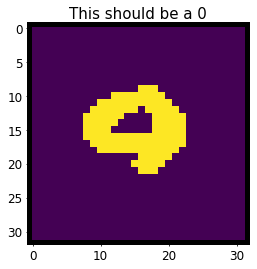

In [3]:
rand_ind = np.random.randint(0,100000)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,title = 'This should be a {}'.format(Y[rand_ind]))
ax.imshow(X[rand_ind])
plt.show()


I use PCA for data reduction

In [4]:
ns=X.shape[0]   #sample size 

In [5]:
X = X.reshape(ns , -1)

In [6]:
X.shape
Y.shape 

(102352,)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

print (X_train.shape)

(76764, 1024)


In [8]:
## Let's see wht pca does!
n_c = 32*32  ## # components we want to keep. 
pca = PCA(n_components= n_c)
pca.fit(X_train)
reduced_X = pca.fit_transform(X)
reduced_X_train = pca.transform(X_train)
reduced_X_test = pca.transform(X_test)
print('The shape of the new data is: {}'.format(reduced_X_train.shape))

The shape of the new data is: (76764, 1024)


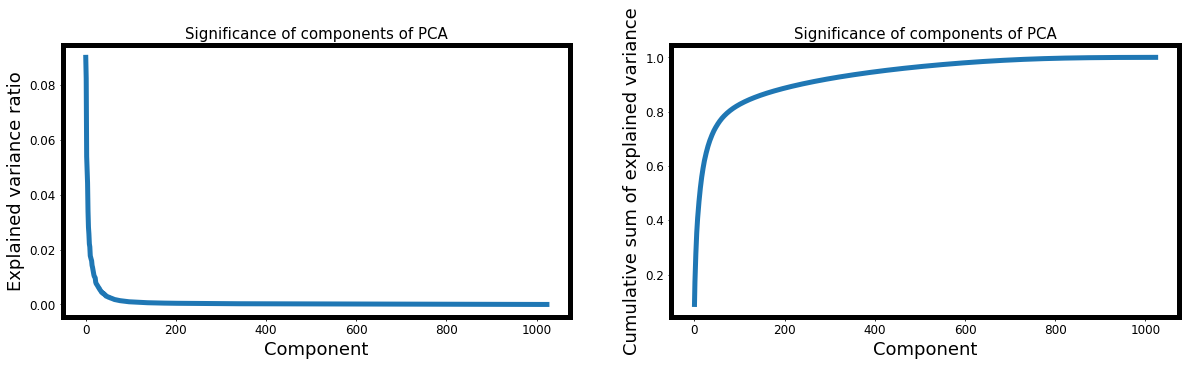

In [13]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1, title = 'Significance of components of PCA', xlabel='Component', ylabel='Explained variance ratio')
ax1.plot(pca.explained_variance_ratio_)
ax1 = fig.add_subplot(1,2,2, title = 'Significance of components of PCA', xlabel='Component', ylabel='Cumulative sum of explained variance')
ax1.plot(np.cumsum(pca.explained_variance_ratio_))

plt.show()

In [10]:
reduced_X_train.shape 

(76764, 1024)

In [ ]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

knn_clf = RandomForestClassifier()
knn_clf_scores = cross_val_score(knn_clf, reduced_X, Y, cv=5, scoring='accuracy')
print('For knn Classifier, the accuracy is {}  +/- {}'.format( knn_clf_scores.mean(), knn_clf_scores.std())  )


In [9]:
n_c = 16 * 16  ## # components we want to keep. 
pca = PCA(n_components= n_c)
pca.fit(X_train)
reduced_X = pca.fit_transform(X)
reduced_X_train = pca.transform(X_train)
reduced_X_test = pca.transform(X_test)
print('The shape of the new data is: {}'.format(reduced_X_train.shape))

The shape of the new data is: (76764, 256)


In [10]:
n_c = 4 * 4  ## # components we want to keep. 
pca = PCA(n_components= n_c)
pca.fit(X_train)
reduced_X = pca.fit_transform(X)
reduced_X_train = pca.transform(X_train)
reduced_X_test = pca.transform(X_test)
print('The shape of the new data is: {}'.format(reduced_X_train.shape))

The shape of the new data is: (76764, 16)


In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf_scores = cross_val_score(knn_clf, reduced_X, Y, cv=5, scoring='accuracy')
print('For random forest classifier Classifier, the accuracy is {}  +/- {}'.format( knn_clf_scores.mean(), knn_clf_scores.std())  )


the classification score with random forest classifier for first 16*16 principal components is 0.94. it is higher than training with  all components which is 0.85!
and still less than 0.97

In [12]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import requests
import io

ImportError: Traceback (most recent call last):
  File "//anaconda/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "//anaconda/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "//anaconda/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "//anaconda/lib/python3.5/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "//anaconda/lib/python3.5/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: dlopen(//anaconda/lib/python3.5/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so, 6): Symbol not found: _clock_gettime
  Referenced from: /anaconda/lib/python3.5/site-packages/tensorflow/python/../libtensorflow_framework.so (which was built for Mac OS X 10.12)
  Expected in: /usr/lib/libSystem.B.dylib
 in /anaconda/lib/python3.5/site-packages/tensorflow/python/../libtensorflow_framework.so


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

In [17]:
X=X.reshape (ns , 32, 32)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,Y_train, batch_size=124 , epochs=10 , validation_data = (X_test, Y_test))

Train on 76764 samples, validate on 25588 samples
Epoch 1/10
76764/76764 [==============================] - 5s 62us/sample - loss: 0.2402 - acc: 0.9331 - val_loss: 0.1268 - val_acc: 0.9665
Epoch 2/10
76764/76764 [==============================] - 4s 57us/sample - loss: 0.0933 - acc: 0.9737 - val_loss: 0.0896 - val_acc: 0.9754
Epoch 3/10
76764/76764 [==============================] - 4s 53us/sample - loss: 0.0616 - acc: 0.9828 - val_loss: 0.0736 - val_acc: 0.9792
Epoch 4/10
76764/76764 [==============================] - 4s 53us/sample - loss: 0.0445 - acc: 0.9876 - val_loss: 0.0619 - val_acc: 0.9823
Epoch 5/10
76764/76764 [==============================] - 4s 55us/sample - loss: 0.0336 - acc: 0.9912 - val_loss: 0.0590 - val_acc: 0.9830
Epoch 6/10
76764/76764 [==============================] - 4s 51us/sample - loss: 0.0259 - acc: 0.9930 - val_loss: 0.0542 - val_acc: 0.9848
Epoch 7/10
76764/76764 [==============================] - 5s 65us/sample - loss: 0.0200 - acc: 0.9948 - val_loss: 0.

Convolutional neural network 

In [20]:
from urllib.request import urlopen
from scipy.misc import imread
import os
import warnings
warnings.filterwarnings('ignore')
img_size = 50

In [21]:
n_w , n_h = X[0].shape
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(n_w , n_h, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
__________

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
n_w = 32
n_h = 32

X_train = X_train.reshape(-1, n_w, n_h, 1)
X_test = X_test.reshape(-1, n_w, n_h, 1)

history = model.fit(X_train,Y_train, 
                    epochs=5, batch_size = 64, 
                   validation_data = (X_test, Y_test))

Train on 76764 samples, validate on 25588 samples
Epoch 1/5
76764/76764 [==============================] - 41s 536us/sample - loss: 0.1477 - acc: 0.9559 - val_loss: 0.0412 - val_acc: 0.9875
Epoch 2/5
76764/76764 [==============================] - 39s 503us/sample - loss: 0.0337 - acc: 0.9894 - val_loss: 0.0269 - val_acc: 0.9909
Epoch 3/5
76764/76764 [==============================] - 39s 505us/sample - loss: 0.0226 - acc: 0.9928 - val_loss: 0.0244 - val_acc: 0.9927
Epoch 4/5
76764/76764 [==============================] - 40s 518us/sample - loss: 0.0167 - acc: 0.9944 - val_loss: 0.0210 - val_acc: 0.9929
Epoch 5/5
76764/76764 [==============================] - 39s 510us/sample - loss: 0.0139 - acc: 0.9955 - val_loss: 0.0206 - val_acc: 0.9936
